# Heat equation

## libs

In [312]:
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt

from matplotlib import animation

## initialization

In [331]:
LENGTH = 1
INITIAL = 0
BOUND = 0

NUMBER_X = 111

STIFFNESS = 1

In [332]:
step_x = LENGTH / NUMBER_X

In [333]:
def source(x):
    return np.exp(-(8 * x - 4)**4)
    #return 0

## building matrices

In [334]:
axis = np.linspace(0, LENGTH, 2 * NUMBER_X + 1)

In [335]:
stiffness_matrix = (14 * np.eye(len(axis)) - 8 * np.roll(np.eye(len(axis)), 1, axis=1) - 
                   8 * np.roll(np.eye(len(axis)), 1, axis=0))

stiffness_matrix[0,-1] = stiffness_matrix[-1,0] = 0

for i in range(1,len(axis)-1,2):
    stiffness_matrix[i+1,i-1] = 1
    stiffness_matrix[i-1,i+1] = 1
    stiffness_matrix[i, i] += 2
    
    
stiffness_matrix *= STIFFNESS / 3 / step_x

In [336]:
source_matrix = np.ones_like(axis)

for i in range(0, len(axis)-2, 2):
    source_matrix[i] = 3 * source(axis[i]) + 4 * source(axis[i+1]) + 3 * source(axis[i+2])
    source_matrix[i+1] = 2 * source(axis[i]) + 16 * source(axis[i+1]) + 2 * source(axis[i+2])
    
source_matrix *= step_x / 30

## initial condition

In [337]:
source_matrix[0] = INITIAL
source_matrix[-1] = BOUND

stiffness_matrix[0,0] = stiffness_matrix[-1,-1] = 1
stiffness_matrix[0,1:] = stiffness_matrix[-1,:-1] = 0

## main procedures

In [338]:
U = sc.solve(stiffness_matrix, source_matrix)
#U_exact = calculate_exact_solution(axis)

## results

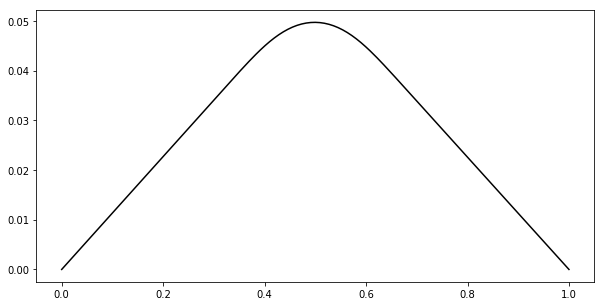

In [339]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(axis, U, c='black',)
#ax.plot(axis, U_exact, c='blue')